In [7]:
import math
import random
import numpy as np

In [21]:
def generate_gaussian_data(n_sample, dim, mean, std, seed=None):
    if seed is not None:
        np.random.seed(seed)
    data = np.random.normal(loc=mean, scale=std, size=(n_sample, dim))
    return data

def center_data(data_matrix):
    mean_vec = np.mean(data_matrix, axis=0)
    return data_matrix - mean_vec, mean_vec

def cov_mat(data_matrix):
    n_samples = data_matrix.shape[0]
    X_c, _ = center_data(data_matrix)
    cov_mat = (X_c.T @ X_c)/n_samples
    return cov_mat

def power_iteration(A, n_iter, tol, true_eigenval):
    v = np.random.random(size=A.shape[1])
    v_norm = np.linalg.norm(v)
    v = v/v_norm
    abs_errors = []

    for _ in range(n_iter):
        v_new = A @ v
        v_norm = np.linalg.norm(v_new)
        lambda_approx = v @ v_new

        abs_errors.append(np.abs(lambda_approx - true_eigenval))
        if v_norm < 1e-15:
            break
        v_new = v_new/v_norm

        if np.linalg.norm(abs(v - v_new)) < tol:
            v = v_new
            break
        v = v_new

    lambda_1 = lambda_approx
    return lambda_1, v, abs_errors



In [22]:
import torch

X = generate_gaussian_data(1000, 20, 0, 1)
cm_np = cov_mat(X)

X = torch.tensor(X)
cm = torch.tensor(cm_np)
l, v = torch.linalg.eigh(cm)
l1_torch = l[-1].item()
print(l1_torch)
l1, v1, errors = power_iteration(cm_np, 1000000, 1e-15, l1_torch)
print("La valeur propre n°1 trouvé par la power méthode est {}".format(l1))

1.3019132326643175
La valeur propre n°1 trouvé par la power méthode est 1.3019132326643168


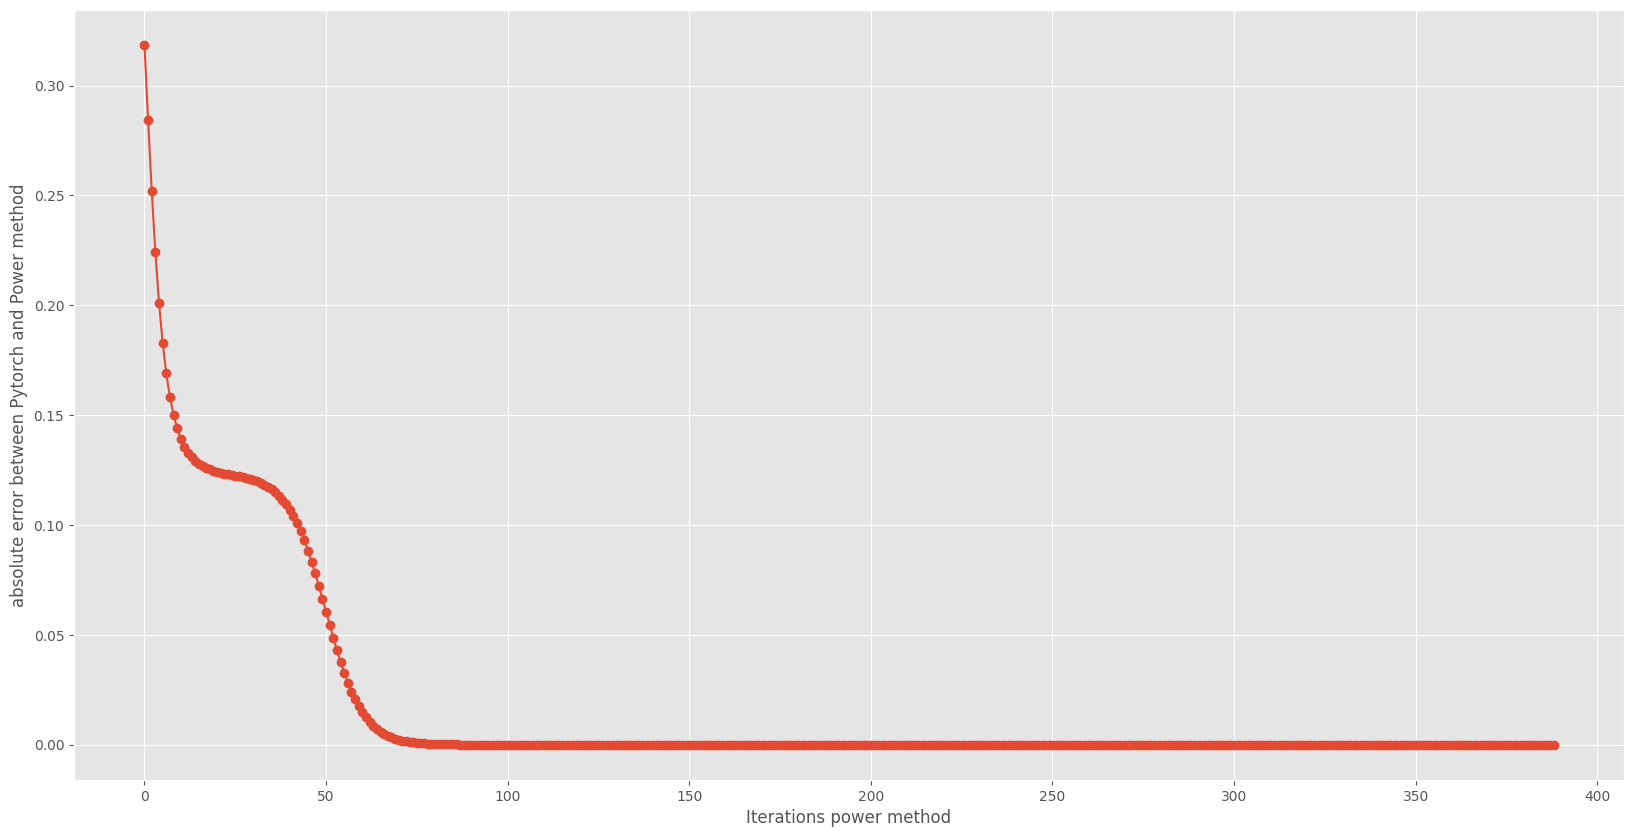

In [23]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.plot(errors, marker='o')
ax1.grid(True)
ax1.set_xlabel("Iterations power method")
ax1.set_ylabel("absolute error between Pytorch and Power method")
plt.show()